## Bibliotecas e carregando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import datetime as dt
import os
import folium

#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#.preprocessing import Imputer
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.feature_selection import SelectFromModel
#from sklearn.utils import shuffle
#from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', 100)

month_num = str(5)
path_to_save = './Tempo-Clima/Analise_dados/'

if not os.path.exists(str(path_to_save+month_num)):
    os.makedirs(str(path_to_save+month_num))
    os.makedirs(str(path_to_save+month_num+'/recovery_data_analise/'))
data = pd.read_csv('./Tempo-Clima/Dados/EMA/Unidos_v2/Brasil_v2/Brasil_'+month_num+'_v4.csv')
#data = data.drop(columns=['Unnamed: 0.1','Unnamed: 0','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'])

# Qual o tamanho da base?

In [2]:
data.shape

(3344568, 29)

# Retirando duplicações de dados e verificando o tamanho novamente

In [3]:
data.drop_duplicates()
data.shape

(3344568, 29)

# Informações da base

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3344568 entries, 0 to 3344567
Data columns (total 29 columns):
Altitude(metros)                              float64
Codigo OMM                                    float64
Day                                           int64
H(UTC)                                        int64
Latitude                                      float64
Longitude                                     float64
Month                                         int64
Nome                                          object
PRECIPITACAO (mm)                             float64
PRESSAO ATMOSFERICA (hPa)                     float64
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              float64
PRESSAO ATMOSFÉRICA MINIMA (hPa)              float64
RADIACAO GLOBAL (KJ/M2)                       float64
TEMPERATURA DO AR (C)                         float64
TEMPERATURA DO PONTO DE ORVALHO (C)           float64
TEMPERATURA MAXIMA (C)                        float64
TEMPERATURA MINIMA (C)        

In [5]:
data.describe().T

count          mean  \
Altitude(metros)                            3344568.0    343.818859   
Codigo OMM                                  3341592.0  85350.994376   
Day                                         3344568.0     16.023472   
H(UTC)                                      3344568.0     11.500000   
Latitude                                    3344568.0    -15.845910   
Longitude                                   3344568.0    -47.777250   
Month                                       3344568.0      5.000000   
PRECIPITACAO (mm)                           2954470.0      0.120741   
PRESSAO ATMOSFERICA (hPa)                   3044593.0    967.422472   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            3040841.0    967.679696   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            3040861.0    967.158104   
RADIACAO GLOBAL (KJ/M2)                     1495234.0   1228.188979   
TEMPERATURA DO AR (C)                       3057042.0     21.929650   
TEMPERATURA DO PONTO DE ORVALHO (C)         3015010.0     17.022693   
TEMPERATURA MAXIMA (C)                      3058016.0     22.546260   
TEMPERATURA MINIMA (C)                      3057973.0     21.350436   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  3016343.0     17.513223   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  3014492.0     16.550846   
UMIDADE RELATIVA DO AR (%)                  3019731.0     76.349837   
UMIDADE RELATIVA DO MAXIMA AR (%)           3019542.0     78.944198   
UMIDADE RELATIVA DO MINIMA AR (%)           3017228.0     73.625597   
VENTO VELOCIDADE                            2990085.0      1.784755   
VENTO, DIRECAO (graus)                      2965223.0    156.626037   
VENTO, RAJADA MAXIMA (m/s)                  2988510.0      4.264604   
Year                                        3344568.0   2011.540676   

                                                    std           min  \
Altitude(metros)                             287.442194      1.001000   
Codigo OMM                                  2262.600744  81609.000000   
Day                                            8.947256      1.000000   
H(UTC)                                         6.922188      0.000000   
Latitude                                       8.176417    -33.742297   
Longitude                                      6.922946    -72.786778   
Month                                          0.000000      5.000000   
PRECIPITACAO (mm)                              1.041481      0.000000   
PRESSAO ATMOSFERICA (hPa)                     37.784538    807.600000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              37.800724    808.800000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              37.768272    806.400000   
RADIACAO GLOBAL (KJ/M2)                      966.544080      0.000000   
TEMPERATURA DO AR (C)                          5.617936     -4.500000   
TEMPERATURA DO PONTO DE ORVALHO (C)            4.642129    -35.600000   
TEMPERATURA MAXIMA (C)                         5.717331     -4.100000   
TEMPERATURA MINIMA (C)                         5.514555     -8.500000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     4.603921    -31.400000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     4.695714    -34.900000   
UMIDADE RELATIVA DO AR (%)                    17.434943     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             16.417222      3.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             18.297686      0.000000   
VENTO VELOCIDADE                               1.580602      0.000000   
VENTO, DIRECAO (graus)                        92.495874      1.000000   
VENTO, RAJADA MAXIMA (m/s)                     2.784621      0.000000   
Year                                           3.195990   2000.000000   

                                                     25%           50%  \
Altitude(metros)                               75.000000    290.000000   
Codigo OMM                                  81975.000000  86729.000000   
Day                                             8.000000     16.000000   
H(UTC)

In [6]:
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257      5   
1             185.0     81963.0    1       1 -9.358353 -69.926257      5   
2             185.0     81963.0    1       2 -9.358353 -69.926257      5   
3             185.0     81963.0    1       3 -9.358353 -69.926257      5   
4             185.0     81963.0    1       4 -9.358353 -69.926257      5   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.2   
1  Parque Estadual Chandless-A102                0.4   
2  Parque Estadual Chandless-A102                0.4   
3  Parque Estadual Chandless-A102                0.2   
4  Parque Estadual Chandless-A102                0.4   

   PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
0                      992.0                             992.0   
1                      993.4                             993.4   
2                      993.5                             993.7   
3                      993.9                             993.9   
4                      994.4                             994.4   

   PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
0                             991.0                      NaN   
1                             992.0                      NaN   
2                             993.4                      NaN   
3                             993.5                      NaN   
4                             993.9                      NaN   

   TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
0                   24.5                                 23.5   
1                   24.3                                 23.5   
2                   24.0                                 23.2   
3                   23.8                                 23.0   
4                   23.8                                 23.1   

   TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
0                    25.4                    24.5   
1                    24.5                    24.3   
2                    24.3                    24.0   
3                    24.0                    23.8   
4                    24.0                    23.8   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        24.0   
1                                        23.6   
2                                        23.5   
3                                        23.2   
4                                        23.3   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        23.5                        94.0   
1                                        23.5                        95.0   
2                                        23.2                        95.0   
3                                        23.0                        96.0   
4                                        23.0                        96.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  \
0                               94.0                               92.0   
1                               95.0                               94.0   
2                               95.0                               95.0   
3                               96.0                               95.0   
4                               96.0                               96.0   

   VENTO VELOCIDADE   VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  \
0                0.0                   347.0                         2.5   
1                0.0                   328.0                         1.4   
2                0.1                    24.0                         0.6   
3                0.0                   317.0                         0.6   
4                0.1                    37.0                         0.9   

   Year                     Cidade Estado Regiao  


In [7]:
data.tail(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
3344563               6.0     86618.0   31      19 -10.473959 -36.482051   
3344564               6.0     86618.0   31      20 -10.473959 -36.482051   
3344565               6.0     86618.0   31      21 -10.473959 -36.482051   
3344566               6.0     86618.0   31      22 -10.473959 -36.482051   
3344567               6.0     86618.0   31      23 -10.473959 -36.482051   

         Month               Nome  PRECIPITACAO (mm)  \
3344563      5  Brejo Grande-A421                NaN   
3344564      5  Brejo Grande-A421                NaN   
3344565      5  Brejo Grande-A421                NaN   
3344566      5  Brejo Grande-A421                NaN   
3344567      5  Brejo Grande-A421                NaN   

         PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
3344563                        NaN                               NaN   
3344564                        NaN                               NaN   
3344565                        NaN                               NaN   
3344566                        NaN                               NaN   
3344567                        NaN                               NaN   

         PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
3344563                               NaN                      NaN   
3344564                               NaN                      NaN   
3344565                               NaN                      NaN   
3344566                               NaN                      NaN   
3344567                               NaN                      NaN   

         TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
3344563                    NaN                                  NaN   
3344564                    NaN                                  NaN   
3344565                    NaN                                  NaN   
3344566                    NaN                                  NaN   
3344567                    NaN                                  NaN   

         TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
3344563                     NaN                     NaN   
3344564                     NaN                     NaN   
3344565                     NaN                     NaN   
3344566                     NaN                     NaN   
3344567                     NaN                     NaN   

         TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
3344563                                         NaN   
3344564                                         NaN   
3344565                                         NaN   
3344566                                         NaN   
3344567                                         NaN   

         TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
3344563                                         NaN   
3344564                                         NaN   
3344565                                         NaN   
3344566                                         NaN   
3344567                                         NaN   

         UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
3344563                         NaN                                NaN   
3344564                         NaN                                NaN   
3344565                         NaN                                NaN   
3344566                         NaN                                NaN   
3344567                         NaN                                NaN   

         UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
3344563                                NaN                NaN   
3344564                                NaN                NaN   
3344565                                NaN                NaN   
3344566                                NaN                NaN   
3344567                                NaN                NaN   

         VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year  \
3344563     

# Temos muitos dados ausentes?

In [8]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.088980
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                             11.663629
PRESSAO ATMOSFERICA (hPa)                      8.969021
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               9.081203
PRESSAO ATMOSFÉRICA MINIMA (hPa)               9.080605
RADIACAO GLOBAL (KJ/M2)                       55.293658
TEMPERATURA DO AR (C)                          8.596805
TEMPERATURA DO PONTO DE ORVALHO (C)            9.853530
TEMPERATURA MAXIMA (C)                         8.567683
TEMPERATURA MINIMA (C)                         8.568969
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     9

In [9]:
data.dropna().shape

(1371226, 29)

In [10]:
data.shape[0] - data.dropna().shape[0]

1973342

In [11]:
((data<0).sum()/len(data))*100

Altitude(metros)                                0.000000
Codigo OMM                                      0.000000
Day                                             0.000000
H(UTC)                                          0.000000
Latitude                                       99.265914
Longitude                                     100.000000
Month                                           0.000000
Nome                                          100.000000
PRECIPITACAO (mm)                               0.000000
PRESSAO ATMOSFERICA (hPa)                       0.000000
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                0.000000
PRESSAO ATMOSFÉRICA MINIMA (hPa)                0.000000
RADIACAO GLOBAL (KJ/M2)                         0.000000
TEMPERATURA DO AR (C)                           0.008461
TEMPERATURA DO PONTO DE ORVALHO (C)             0.128836
TEMPERATURA MAXIMA (C)                          0.004933
TEMPERATURA MINIMA (C)                          0.013724
TEMPERATURA MÁXIMA DO PONTO DE 

# Quais os valores minimos e maximos?

In [12]:
data.min()

Altitude(metros)                                      1.001
Codigo OMM                                            81609
Day                                                       1
H(UTC)                                                    0
Latitude                                           -33.7423
Longitude                                          -72.7868
Month                                                     5
Nome                                          Abrolhos-A422
PRECIPITACAO (mm)                                         0
PRESSAO ATMOSFERICA (hPa)                             807.6
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                      808.8
PRESSAO ATMOSFÉRICA MINIMA (hPa)                      806.4
RADIACAO GLOBAL (KJ/M2)                                   0
TEMPERATURA DO AR (C)                                  -4.5
TEMPERATURA DO PONTO DE ORVALHO (C)                   -35.6
TEMPERATURA MAXIMA (C)                                 -4.1
TEMPERATURA MINIMA (C)                  

In [13]:
data.max()

Altitude(metros)                                      997
Codigo OMM                                          86998
Day                                                    31
H(UTC)                                                 23
Latitude                                          3.81358
Longitude                                        -34.8156
Month                                                   5
Nome                                          Óbidos-A232
PRECIPITACAO (mm)                                    85.2
PRESSAO ATMOSFERICA (hPa)                            1050
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                     1050
PRESSAO ATMOSFÉRICA MINIMA (hPa)                     1050
RADIACAO GLOBAL (KJ/M2)                           6876.47
TEMPERATURA DO AR (C)                                44.8
TEMPERATURA DO PONTO DE ORVALHO (C)                  42.7
TEMPERATURA MAXIMA (C)                               44.8
TEMPERATURA MINIMA (C)                               41.5
TEMPERATURA MÁ

# Matriz de correlação dos dados

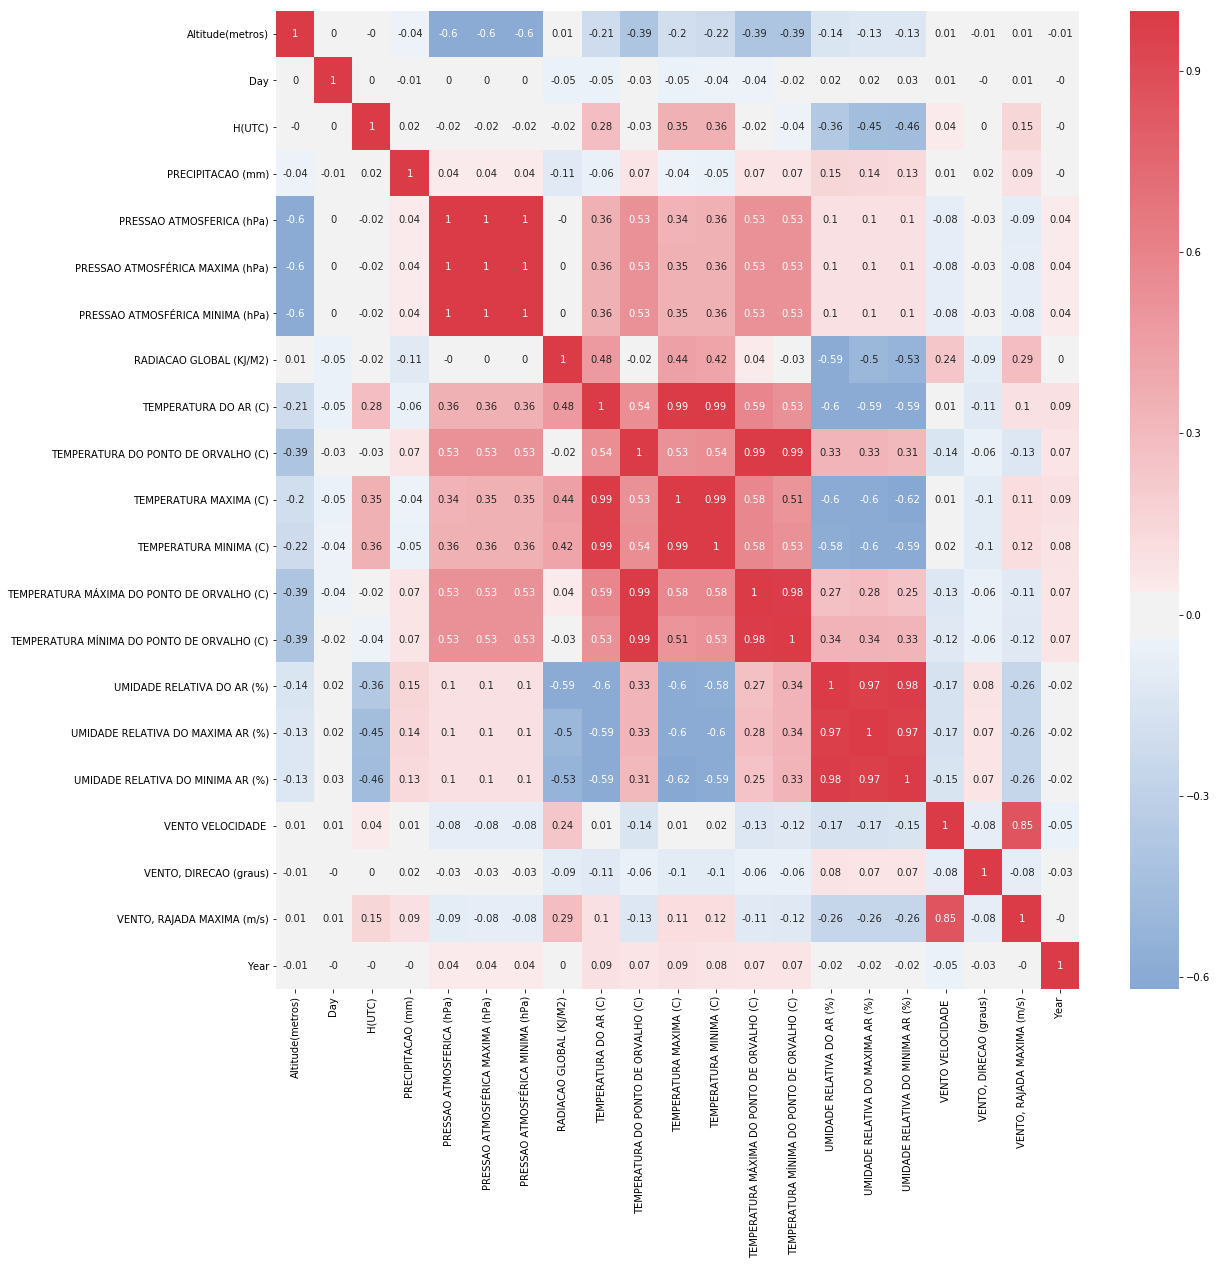

In [14]:
all_columns_num = data.columns.tolist()
all_columns_num.remove('Nome')
all_columns_num.remove('Month')
all_columns_num.remove('Latitude')
all_columns_num.remove('Longitude')
all_columns_num.remove('Codigo OMM')
all_columns_num.remove('Cidade')
all_columns_num.remove('Estado')
all_columns_num.remove('Regiao')
data_clean = data.dropna()
cor_matrix = data_clean[all_columns_num].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

## Fazendo um mapa para verificar como esta cada estação em relação a dados ausentes e a consistencias dos dados

In [15]:
def make_marker(name,lat,long,alt, temp_min,temp_max, temp_min_min,temp_min_max,
                temp_max_min,temp_max_max, prep_min,prep_max, ur_min,ur_max,
                ur_min_min,ur_min_max, ur_max_min,ur_max_max, miss_data_temp_min,
                miss_data_temp_max, miss_data_prep, miss_data_ur_min, miss_data_ur_max,
                miss_data_ur,color):
    return folium.Marker(location=[df_temp['Latitude'].unique()[0],df_temp['Longitude'].unique()[0]], 
                 popup='''
                 Name: {:s}
                 Latitude:{:f}
                 longitude:{:f}
                 Altitude(metros) : {:f}
                 Minimos e Maximos
                 
                 Temperatura do ar: {:f}\t{:f}
                 Temperatura Minima: {:f}\t{:F}
                 Temperatura Maxima:  {:f}\t{:f}
                 Precipitação: {:f}\t{:f}
                 Umidade Relativa: {:f}\t{:f}
                 UR Minima: {:f}\t{:f}
                 UR Maxima: {:f}\t{:f}
                 
                 Dados Ausentes
                 
                 Temperatura Minima: {:f}
                 Temperatura Maxima: {:f}
                 Precipitação: {:f}
                 UR Minima: {:f}
                 UR Maxima: {:f}
                 UR:{:f}
                 '''.format(name,lat,long,alt,
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur), 
                icon=folium.Icon(color=color))

### Problemas procurados

##### - Temperatura minima              > Temperatura Maxima
##### - Temperatura(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Temperatura minima do Ponto de Orvalho              > Temperatura Maxima do Ponto de Orvalho
##### - Temperatura do Ponto de Orvalho(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Umidade Relativa(min,max,do ar) < 0 OU Umidade Relativa(min,max,do ar)   >100
##### - Umidade relativa minima         > Umidade relativa maxima
##### - Dados ausentes > 30

In [16]:
#Grupo de marcadores para possivel problemas
fg_miss_data          =      folium.FeatureGroup(name='Miss Data')
fg_temp_inconsistency =      folium.FeatureGroup(name='Temp correlation Inconsistency')
fg_temp_min           =      folium.FeatureGroup(name='Temp minima Inconsistency')
fg_temp               =      folium.FeatureGroup(name='Temp air Inconsistency')
fg_temp_max           =      folium.FeatureGroup(name='Temp Maxima Inconsistency')
fg_ur_inconsistency   =      folium.FeatureGroup(name='Umildade Relatica Inconsistency')

df_miss_data = pd.DataFrame(columns = ['Estação','Md_temp_max','Md_temp_min','Md_temp','Md_ur_max','Md_ur_min','MD_ur','Md_prec'])

recovery_list = []
danger_list = []
temp_min_list = []
temp_max_list = []
temp_inconsistency_list = []
temp_list = []
ur_list = []

for name in data['Nome'].unique().tolist():
    
    df_temp = data.loc[lambda df: df.Nome == name, :]
    #Maximo e minimos
    temp_min     = df_temp['TEMPERATURA DO AR (C)'].min()
    temp_max     = df_temp['TEMPERATURA DO AR (C)'].max()
    temp_min_min = df_temp['TEMPERATURA MINIMA (C)'].min()
    temp_min_max = df_temp['TEMPERATURA MINIMA (C)'].max()
    temp_max_min = df_temp['TEMPERATURA MAXIMA (C)'].min()
    temp_max_max = df_temp['TEMPERATURA MAXIMA (C)'].max()
    prep_max     = df_temp['PRECIPITACAO (mm)'].max()
    prep_min     = df_temp['PRECIPITACAO (mm)'].min()
    ur_max       = df_temp['UMIDADE RELATIVA DO AR (%)'].max()
    ur_min       = df_temp['UMIDADE RELATIVA DO AR (%)'].min()
    ur_max_max   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].max()
    ur_max_min   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].min()
    ur_min_max   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].max()
    ur_min_min   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].min()
    #Dados ausentes
    miss_data_temp     = (df_temp['TEMPERATURA DO AR (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA DO AR (C)']))*100
    miss_data_temp_min = (df_temp['TEMPERATURA MINIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MINIMA (C)']))*100
    miss_data_temp_max = (df_temp['TEMPERATURA MAXIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MAXIMA (C)']))*100
    miss_data_prep     = (df_temp['PRECIPITACAO (mm)'].isnull().sum()/
                          len(df_temp['PRECIPITACAO (mm)']))*100
    miss_data_ur_min   = (df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MINIMA AR (%)']))*100
    miss_data_ur_max   = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']))*100
    miss_data_ur       = (df_temp['UMIDADE RELATIVA DO AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO AR (%)']))*100
    #Estações com 10% a 50% de dados ausentes poderão ser interpolados
    miss_recovery = (miss_data_temp> 10 and miss_data_temp < 30,
                      miss_data_temp_min> 10 and miss_data_temp_min < 30,
                      miss_data_prep > 10 and miss_data_prep< 30,
                      miss_data_temp_max > 10 and miss_data_temp_max < 30,
                      miss_data_ur > 10 and miss_data_ur < 30,
                      miss_data_ur_max > 10 and miss_data_ur_max < 30,
                      miss_data_ur_min > 10 and miss_data_ur_min < 30)
    #Estações com 50% ou mais de dados ausentes poderam ser eliminadas
    miss_danger = (miss_data_temp > 30,miss_data_temp_min> 30,miss_data_prep> 30,
                   miss_data_temp_max> 30,miss_data_ur> 30,
                   miss_data_ur_max> 30,miss_data_ur_min > 30)
    
    df_miss_data = df_miss_data.append(pd.DataFrame([name,miss_data_temp_max,miss_data_temp_min,miss_data_temp,miss_data_ur_max,
              miss_data_ur_min,miss_data_ur,miss_data_prep], index = df_miss_data.columns.tolist()).T)
    if miss_danger == (1,1,1,1,1,1,1):
        color = 'red'
        danger_list.append(name)
    elif True in miss_recovery:
        color = 'purple'
        recovery_list.append(name)
    else:
        color = 'green'
    fg_miss_data.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
        
    temp_inconsistency = (df_temp['TEMPERATURA MAXIMA (C)'] <= df_temp['TEMPERATURA MINIMA (C)'])
    
    if True in temp_inconsistency:
        color = 'red'
        temp_inconsistency_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_max_min < 0) or (temp_max_max > 45):
        color = 'red'
        temp_max_list.append(name)
    else:
        color = 'green'
    fg_temp_max.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min < 0) or (temp_max > 45):
        color = 'red'
        temp_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min_min < 0) or (temp_min_max > 45):
        color = 'red'
        temp_min_list.append(name)
    else:
        color = 'green'
    
    fg_temp_min.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    ur_min_danger = (ur_min < 0, ur_max_min < 0, ur_min_min < 0 )
    ur_max_danger = (ur_max >100,ur_max_max>100,ur_min_max>100)
    ur_inconsistency = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'] <= df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'])
   
    if (True in ur_min_danger) or (True in ur_max_danger) or (True in ur_inconsistency):
        color = 'red'
        ur_list.append(name)
    else:
        color = 'green'
    fg_ur_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))

map_miss_data          = folium.Map()
map_temp_inconsistency = folium.Map()
map_temp_min           = folium.Map()
map_temp_max           = folium.Map()
map_ur_inconsistency   = folium.Map()
map_miss_data.add_child(fg_miss_data).save(str(path_to_save+month_num+'/map_'+month_num+'_miss_data.html'))
map_temp_inconsistency.add_child(fg_temp_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_temp_incosistency.html')
map_temp_min.add_child(fg_temp_min).save(path_to_save+month_num+'/map_'+month_num+'_temp_min.html')
map_temp_max.add_child(fg_temp_max).save(path_to_save+month_num+'/map_'+month_num+'_temp_max.html')
map_ur_inconsistency.add_child(fg_ur_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_ur_incosistency.html')

df_miss_data = df_miss_data.reset_index(drop=True)
df_miss_data.to_csv(str(path_to_save+month_num+'/'+'Data_miss.csv'))

# Analisando as possiveis incosistencia nos dados 
## Verificando os dados da Umidade relativa

In [17]:
len(ur_list)

1

In [18]:
ur_list

['Parque Estadual Chandless-A102']

In [19]:
df_temp = data.loc[lambda df: df.Nome == ur_list[0], :].reset_index()
errors = df_temp.loc[df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']<=df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'],:]['index'].tolist()
data.iloc[errors][['UMIDADE RELATIVA DO MAXIMA AR (%)','UMIDADE RELATIVA DO MINIMA AR (%)','UMIDADE RELATIVA DO AR (%)']].count()

UMIDADE RELATIVA DO MAXIMA AR (%)    605
UMIDADE RELATIVA DO MINIMA AR (%)    605
UMIDADE RELATIVA DO AR (%)           605
dtype: int64

Como podemos ver os dados de umidade estão todos iguais nestes registros, por isso iremos retila-los

In [20]:
data.loc[errors,'UMIDADE RELATIVA DO MAXIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO MINIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO AR (%)'] = np.nan

## Incosistencia nos dados de temperatura

In [21]:
temp_inconsistency_list

['Parque Estadual Chandless-A102']

### Foi encontrado apenas uma estação com incosistencia de dados de temperatura, vamos ver estes erros

In [22]:
df_temp = data.loc[lambda df: df.Nome == 'Parque Estadual Chandless-A102', :].reset_index()
errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<=df_temp['TEMPERATURA MINIMA (C)'],:]['index'].tolist()
data.iloc[errors].count()

Altitude(metros)                              5
Codigo OMM                                    5
Day                                           5
H(UTC)                                        5
Latitude                                      5
Longitude                                     5
Month                                         5
Nome                                          5
PRECIPITACAO (mm)                             5
PRESSAO ATMOSFERICA (hPa)                     5
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              5
PRESSAO ATMOSFÉRICA MINIMA (hPa)              5
RADIACAO GLOBAL (KJ/M2)                       1
TEMPERATURA DO AR (C)                         5
TEMPERATURA DO PONTO DE ORVALHO (C)           5
TEMPERATURA MAXIMA (C)                        5
TEMPERATURA MINIMA (C)                        5
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)    5
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)    5
UMIDADE RELATIVA DO AR (%)                    1
UMIDADE RELATIVA DO MAXIMA AR (%)       

#### Apenas uma estação foi encontrada com incosistencia na temperatura, e este problema é por causa que os dados de temperatura estão todos iguais

In [23]:
data.loc[errors,'TEMPERATURA DO AR (C)'] = np.nan
data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

## Possiveis erros de temperatura maxima

In [27]:
len(temp_max_list)

26

In [28]:
temp_max_list

['Goiânia-A002',
 'Santo Augusto-A805',
 'Santa Rosa-A810',
 'Caçapava do Sul-A812',
 'Alegrete-A826',
 'Erechim-A828',
 'São José dos Ausentes-A829',
 'Quaraí-A831',
 'Passo Fundo-A839',
 'Bento Gonçalves-A840',
 'Lagoa Vemelha-A844',
 'São Joaquim-A815',
 'Joaçaba-A841',
 'Morro da Igreja (Bom Jardim da Serra)-A845',
 'Caçador-A859',
 'Curitibanos-A860',
 'Rio do Campo-A861',
 'Rio Negrinho-A862',
 'Major Vieira-A864',
 'Ivaí-A818',
 'Castro-A819',
 'Inácio Martins-A823',
 'Dois Vizinhos-A843',
 'São Mateus do Sul-A874',
 'General Carneiro-A875',
 'Monte Verde-A509']

In [26]:
map_temp_max

#### Como temos muitas estações com possiveis registros de baixas temperaturas, vamos olhar o numero de registros que cada uma tem para saber se isso é correcorrente, se isso se repete em outros anos e em qual região do Brasil esta a estação

In [29]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 9 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Santo Augusto-A805'] Numero de Registross: 85 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]

Estação: ['Santa Rosa-A810'] Numero de Registross: 67 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Caçapava do Sul-A812'] Numero de Registross: 64 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Alegrete-A826'] Numero de Registross: 126 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Erechim-A828'] Numero de Registross: 129 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016

In [29]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Santo Augusto-A805'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]

Estação: ['Santa Rosa-A810'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Caçapava do Sul-A812'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Alegrete-A826'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Erechim-A828'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Esta

In [46]:
df_temp = data.loc[lambda df: df.Nome == temp_max_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','UMIDADE RELATIVA DO AR (%)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  TEMPERATURA DO AR (C)  \
461213                     NaN                    -0.2                    NaN   
461791                     NaN                     1.7                    1.7   
462847                     4.3                     4.8                    4.3   
462848                     3.1                     4.6                    3.1   
462849                     3.0                     3.6                    3.1   
462850                     2.6                     3.1                    2.7   
462873                     4.2                     4.7                    4.3   
462874                     3.4                     4.3                    4.1   
467028                     NaN                     1.9                    1.9   

        UMIDADE RELATIVA DO AR (%)  Year  Day  H(UTC)          Nome  
461213                        92.0  2008    7       5  Goiânia-A002  
461791                        93.0  2008   31       7  Goiânia-A002  
462847                        98.0  2010   13       7  Goiânia-A002  
462848                        98.0  2010   13       8  Goiânia-A002  
462849                        99.0  2010   13       9  Goiânia-A002  
462850                        99.0  2010   13      10  Goiânia-A002  
462873                        98.0  2010   14       9  Goiânia-A002  
462874                        98.0  2010   14      10  Goiânia-A002  
467028                        82.0  2016    1      12  Goiânia-A002

In [47]:
df_temp = data.loc[lambda df: df.Nome == 'Monte Verde-A509', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome','Regiao','Estado']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1733121                     3.7                     4.8   
1733122                     3.1                     3.7   
1733138                     3.7                     4.5   
1733139                     3.4                     3.9   
1733140                     2.6                     3.4   
1733141                     1.9                     2.8   
1733142                     1.4                     2.0   
1733143                     0.4                     1.6   
1733144                     0.1                     0.7   
1733145                    -0.2                     0.8   
1733146                    -0.4                     0.8   
1733161                     3.7                     4.6   
1733162                     3.0                     4.0   
1733163                     2.3                     3.4   
1733164                     1.7                     2.3   
1733165                     0.6                     1.8   
1733166                     0.5                     1.2   
1733313                     3.7                     4.7   
1733314                     3.7                     4.3   
1733482                     2.6                     4.0   
1733505                     3.2                     4.6   
1734387                     3.3                     4.5   
1734388                     2.5                     3.5   
1734389                     1.8                     3.4   
1734390                     1.1                     2.9   
1734391                     1.3                     3.1   
1734392                     1.3                     2.7   
1734414                     4.2                     4.7   
1734415                     3.9                     4.7   
1734416                     2.8                     4.5   
...                         ...                     ...   
1737508                     3.7                     4.8   
1737511                     3.5                     4.8   
1737513                     2.9                     4.9   
1737514                     2.6                     4.2   
1738420                     3.1                     4.6   
1738421                     2.3                     3.4   
1738422                     2.4                     3.7   
1738423                     2.2                     3.5   
1738424                     2.1                     3.6   
1738425                     1.8                     3.3   
1738426                     2.7                     3.9   
1738445                     3.5                     4.2   
1738468                     3.6                     4.9   
1738469                     3.2                     4.8   
1738471                     3.2                     4.5   
1738472                     2.6                     3.9   
1738473                     2.1                     4.4   
1738474                     2.0                     3.9   
1738490                     4.4                     4.9   
1738497                     3.4                     4.5   
1738522                     2.7                     4.8   
1739482                     4.0                     4.9   
1740513                     3.2                     4.9   
1740555                     3.0                     4.8   
1740556                     2.7                     4.2   
1740557                     2.3                     4.7   
1740558                     2.2                     4.0   
1740559                     1.8                     3.5   
1740560                     1.6                     4.0   
1740561                     1.8                     3.9   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)              Nome    Regiao  \
1733121                    3.7  2006    3       9  Monte Verde-A509  Suldeste   
1733122                    3.4  2006    3      10  Monte Verde-A509  Suldeste   
1733138                    3.7  2006    4       2  Monte Verde-A509  Suldeste   
1733139                   

In [48]:
for name in ['Goiânia-A00']:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
    errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan

## Possiveis erros de temperatura minima

In [49]:
len(temp_min_list)

33

In [43]:
temp_min_list

['Goiânia-A002',
 'Santo Augusto-A805',
 'Santa Rosa-A810',
 'Canguçu-A811',
 'Caçapava do Sul-A812',
 'Alegrete-A826',
 'Bagé-A827',
 'Erechim-A828',
 'São José dos Ausentes-A829',
 'Quaraí-A831',
 'Soledade-A837',
 'Passo Fundo-A839',
 'Bento Gonçalves-A840',
 'Lagoa Vemelha-A844',
 'Cruz Alta-A853',
 'Vacaria-A880',
 'São Joaquim-A815',
 'Joaçaba-A841',
 'Morro da Igreja (Bom Jardim da Serra)-A845',
 'Caçador-A859',
 'Curitibanos-A860',
 'Rio do Campo-A861',
 'Rio Negrinho-A862',
 'Ituporanga-A863',
 'Major Vieira-A864',
 'Ivaí-A818',
 'Castro-A819',
 'Inácio Martins-A823',
 'Dois Vizinhos-A843',
 'São Mateus do Sul-A874',
 'General Carneiro-A875',
 'Monte Verde-A509',
 'Pirapora-A545']

In [50]:
map_temp_min

In [51]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 29 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Santo Augusto-A805'] Numero de Registross: 120 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]

Estação: ['Santa Rosa-A810'] Numero de Registross: 131 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Canguçu-A811'] Numero de Registross: 102 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Caçapava do Sul-A812'] Numero de Registross: 111 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Alegrete-A826'] Numero de Registross: 222 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 

In [52]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Santo Augusto-A805'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]

Estação: ['Santa Rosa-A810'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Caçapava do Sul-A812'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Alegrete-A826'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Erechim-A828'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Esta

In [53]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
461195  Goiânia-A002                     1.5                    13.9   
461215  Goiânia-A002                     4.9                    14.7   
461574  Goiânia-A002                    -2.8                    13.3   
461575  Goiânia-A002                     3.0                    12.5   
461606  Goiânia-A002                    -5.7                    26.5   
461622  Goiânia-A002                    -0.5                    12.6   
461626  Goiânia-A002                     2.1                    10.8   
461667  Goiânia-A002                     0.7                    14.5   
461668  Goiânia-A002                     0.7                    13.7   
461712  Goiânia-A002                     1.2                    19.3   
461716  Goiânia-A002                     3.9                    15.9   
462095  Goiânia-A002                     4.2                    23.8   
462846  Goiânia-A002                     4.8                     5.6   
462847  Goiânia-A002                     4.3                     4.8   
462848  Goiânia-A002                     3.1                     4.6   
462849  Goiânia-A002                     3.0                     3.6   
462850  Goiânia-A002                     2.6                     3.1   
462851  Goiânia-A002                     2.6                     5.1   
462872  Goiânia-A002                     4.7                     5.3   
462873  Goiânia-A002                     4.2                     4.7   
462874  Goiânia-A002                     3.4                     4.3   
462875  Goiânia-A002                     4.2                     8.0   
467016  Goiânia-A002                     3.5                    18.3   
467029  Goiânia-A002                    -3.3                    19.6   
467050  Goiânia-A002                     0.2                    11.4   
467162  Goiânia-A002                    -1.2                    16.8   
467212  Goiânia-A002                    -3.2                    19.2   
467216  Goiânia-A002                     2.4                    17.4   
467575  Goiânia-A002                    -7.0                    13.9   

        TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
461195                   13.3  2008    6      11  
461215                   14.2  2008    7       7  
461574                    NaN  2008   22       6  
461575                   12.0  2008   22       7  
461606                   26.3  2008   23      14  
461622                    NaN  2008   24       6  
461626                    NaN  2008   24      10  
461667                    NaN  2008   26       3  
461668                   13.0  2008   26       4  
461712                   18.4  2008   28       0  
461716                    NaN  2008   28       4  
462095                    NaN  2009   12      23  
462846                    4.8  2010   13       6  
462847                    4.3  2010   13       7  
462848                    3.1  2010   13       8  
462849                    3.1  2010   13       9  
462850                    2.7  2010   13      10  
462851                    5.1  2010   13      11  
462872                    4.7  2010   14       8  
462873                    4.3  2010   14       9  
462874                    4.1  2010   14      10  
462875                    8.0  2010   14      11  
467016                   16.4  2016    1       0  
467029                   19.5  2016    1      13  
467050                   11.4  2016    2      10  
467162                   16.0  2016    7       2  
467212                   18.2  2016    9       4  
467216                   16.9  2016    9       8  
467575                   13.4  2016   24       7

In [54]:
df_temp = data.loc[lambda df: df.Nome == 'Pirapora-A545', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1995099  Pirapora-A545                     0.5                    19.9   
1995104  Pirapora-A545                    -8.5                    17.7   
1995125  Pirapora-A545                     4.4                    24.2   
1995166  Pirapora-A545                    -7.3                    23.7   
1995192  Pirapora-A545                     3.6                    21.6   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
1995099                   17.9  2012    7       3  
1995104                    NaN  2012    7       8  
1995125                   20.4  2012    8       5  
1995166                   19.6  2012    9      22  
1995192                   21.1  2012   11       0

In [56]:
for name in ['Goiânia-A002','Pirapora-A545']:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

In [57]:
for name in ['Goiânia-A002','Pirapora-A545']:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

In [ ]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

#### Como podemos ver existe alguns dados fora do padrão dos demais registro, como os dados de Pressão atmosferica que podemos perceber que sua relação com Altidude não esta muito correta. iremos retirar este dados também

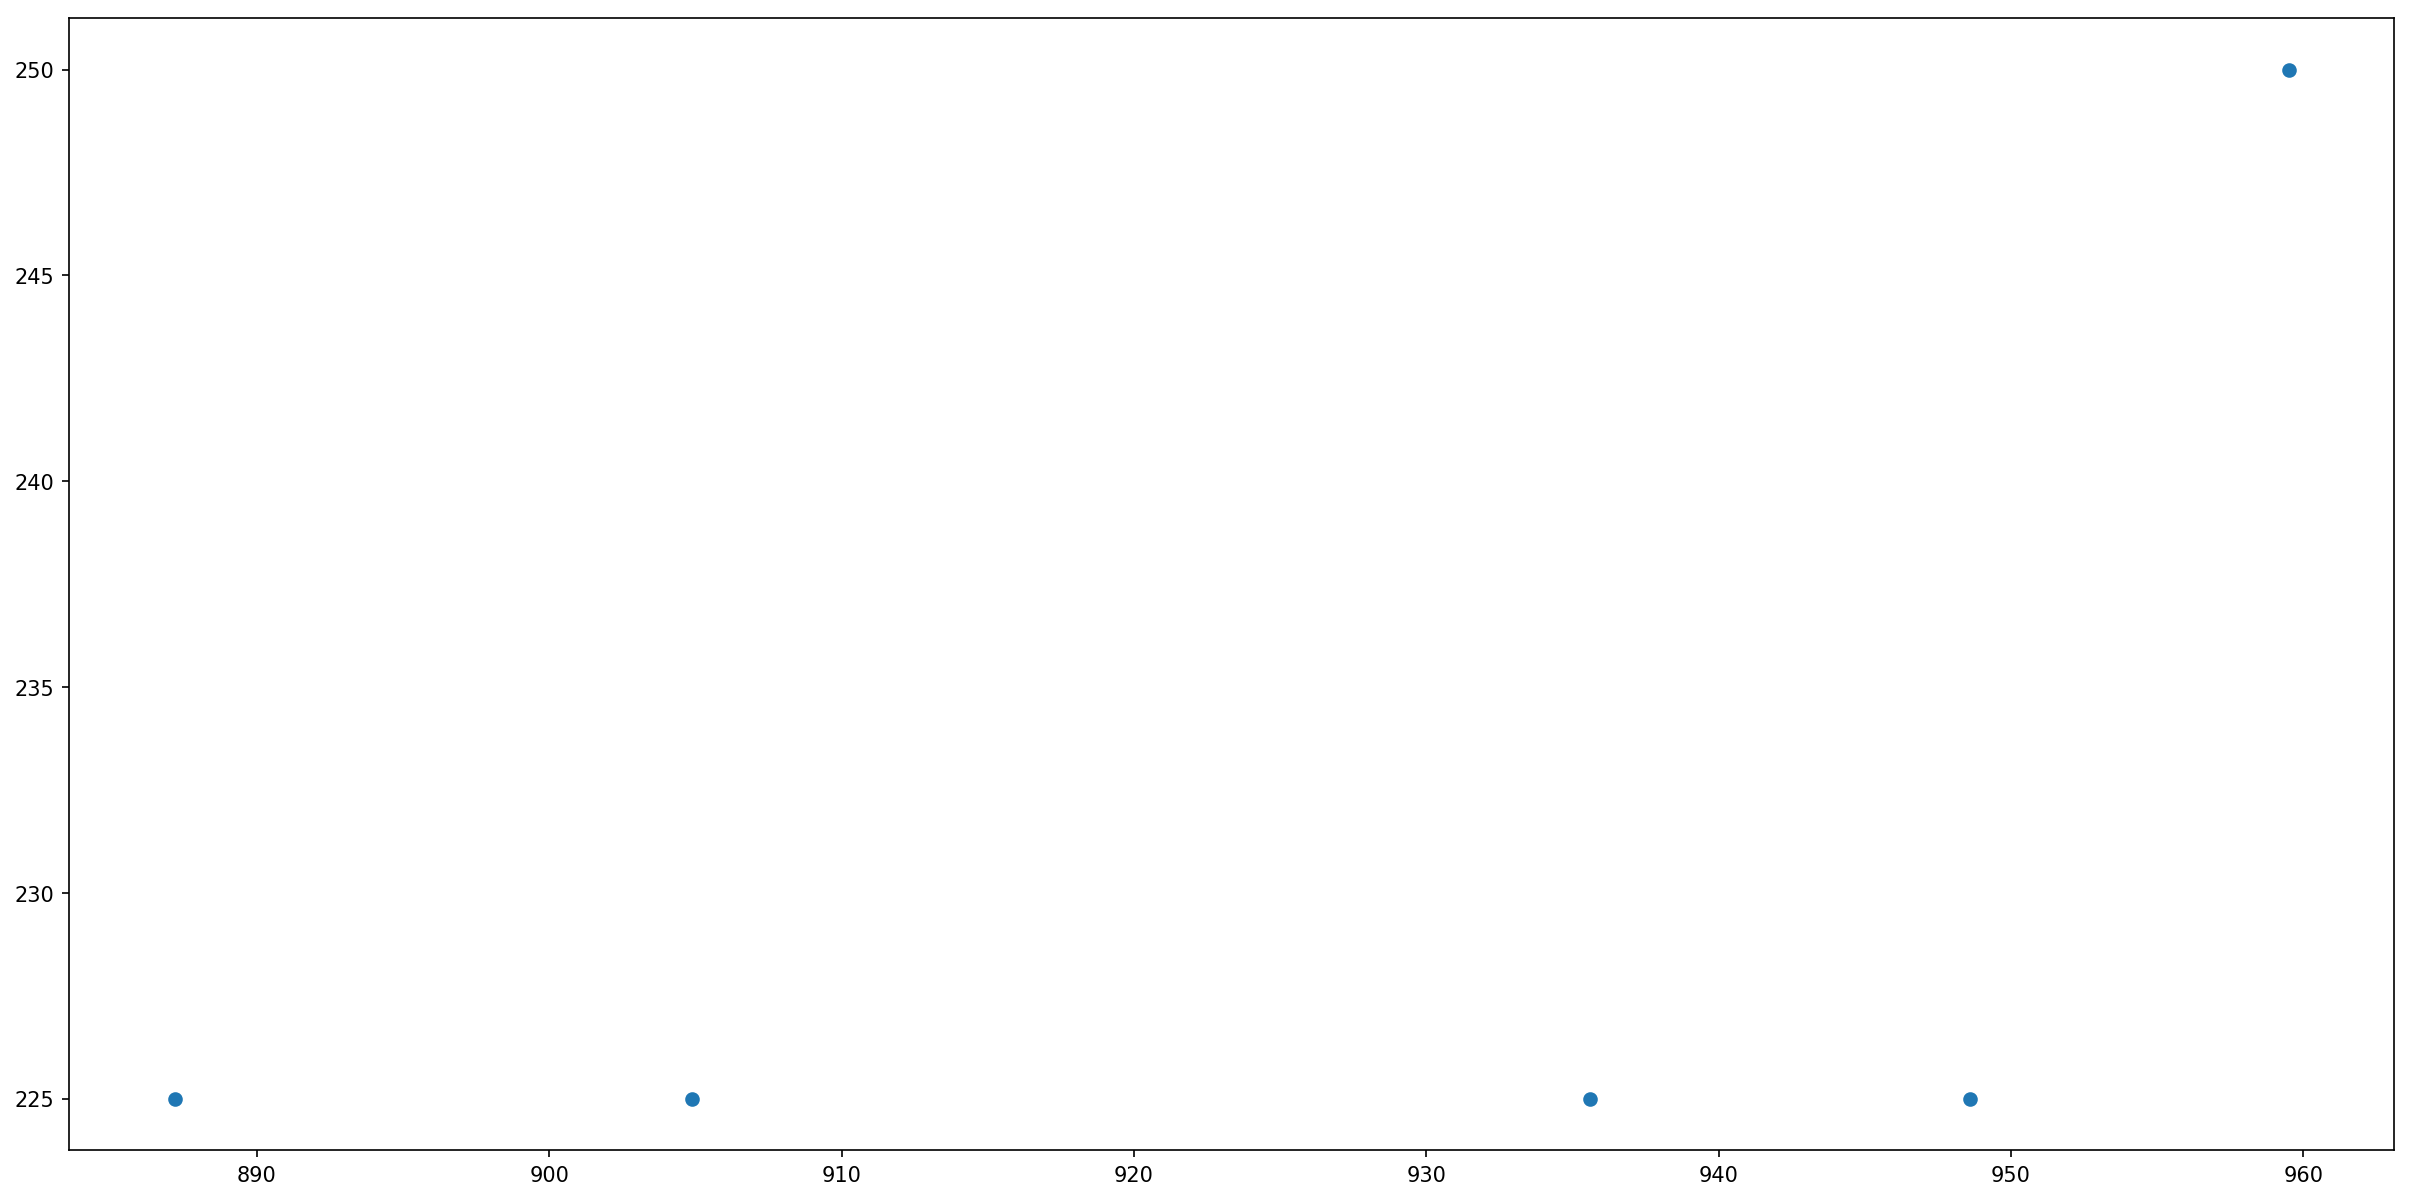

In [80]:
plt.figure(figsize=(20, 10), dpi=150)
plt.scatter(data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<960),:]['PRESSAO ATMOSFERICA (hPa)'],
           data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<960),:]['Altitude(metros)'])


In [81]:
data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<250)&(data['PRESSAO ATMOSFERICA (hPa)']<960),:].head(10)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  Month  \
29925             225.0     86620.0    7      21 -11.023752  -68.73518      5   
30065             225.0     86620.0   13      17 -11.023752  -68.73518      5   
30066             225.0     86620.0   13      18 -11.023752  -68.73518      5   
30502             225.0     86620.0   31      22 -11.023752  -68.73518      5   

                      Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
29925  Epitaciolândia-A140                0.2                      948.6   
30065  Epitaciolândia-A140                0.0                      887.2   
30066  Epitaciolândia-A140                0.0                      904.9   
30502  Epitaciolândia-A140                0.0                      935.6   

       PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
29925                            1001.0                             942.8   
30065                             943.6                             853.4   
30066                             904.9                             887.2   
30502                            1036.4                             935.6   

       TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
29925                   27.3                                 20.3   
30065                   30.1                                 22.2   
30066                   30.1                                 21.9   
30502                   25.2                                 24.0   

       TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
29925                    27.7                    26.8   
30065                    30.5                    28.4   
30066                    30.8                    29.3   
30502                    27.1                    25.2   

       TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
29925                                        21.0   
30065                                        23.3   
30066                                        23.3   
30502                                        24.5   

       TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
29925                                        19.6                        66.0   
30065                                        21.2                        63.0   
30066                                        21.4                        62.0   
30502                                        23.6                        93.0   

       UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  \
29925                               68.0                               62.0   
30065                               72.0                               61.0   
30066                               67.0                               59.0   
30502                               94.0                               81.0   

       Year          Cidade Estado Regiao  
29925  2013  Epitaciolândia   Acre  Norte  
30065  2013  Epitaciolândia   Acre  Norte  
30066  2013  Epitaciolândia   Acre  Norte  
30502  2013  Epitaciolândia   Acre  Norte

In [82]:
errors = data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<960),:].index.tolist()
print('Numero de resgitros que serão retirados: {}'.format(len(errors)))
data.loc[errors,'PRESSAO ATMOSFERICA (hPa)'] = np.nan

Numero de resgitros que serão retirados: 5


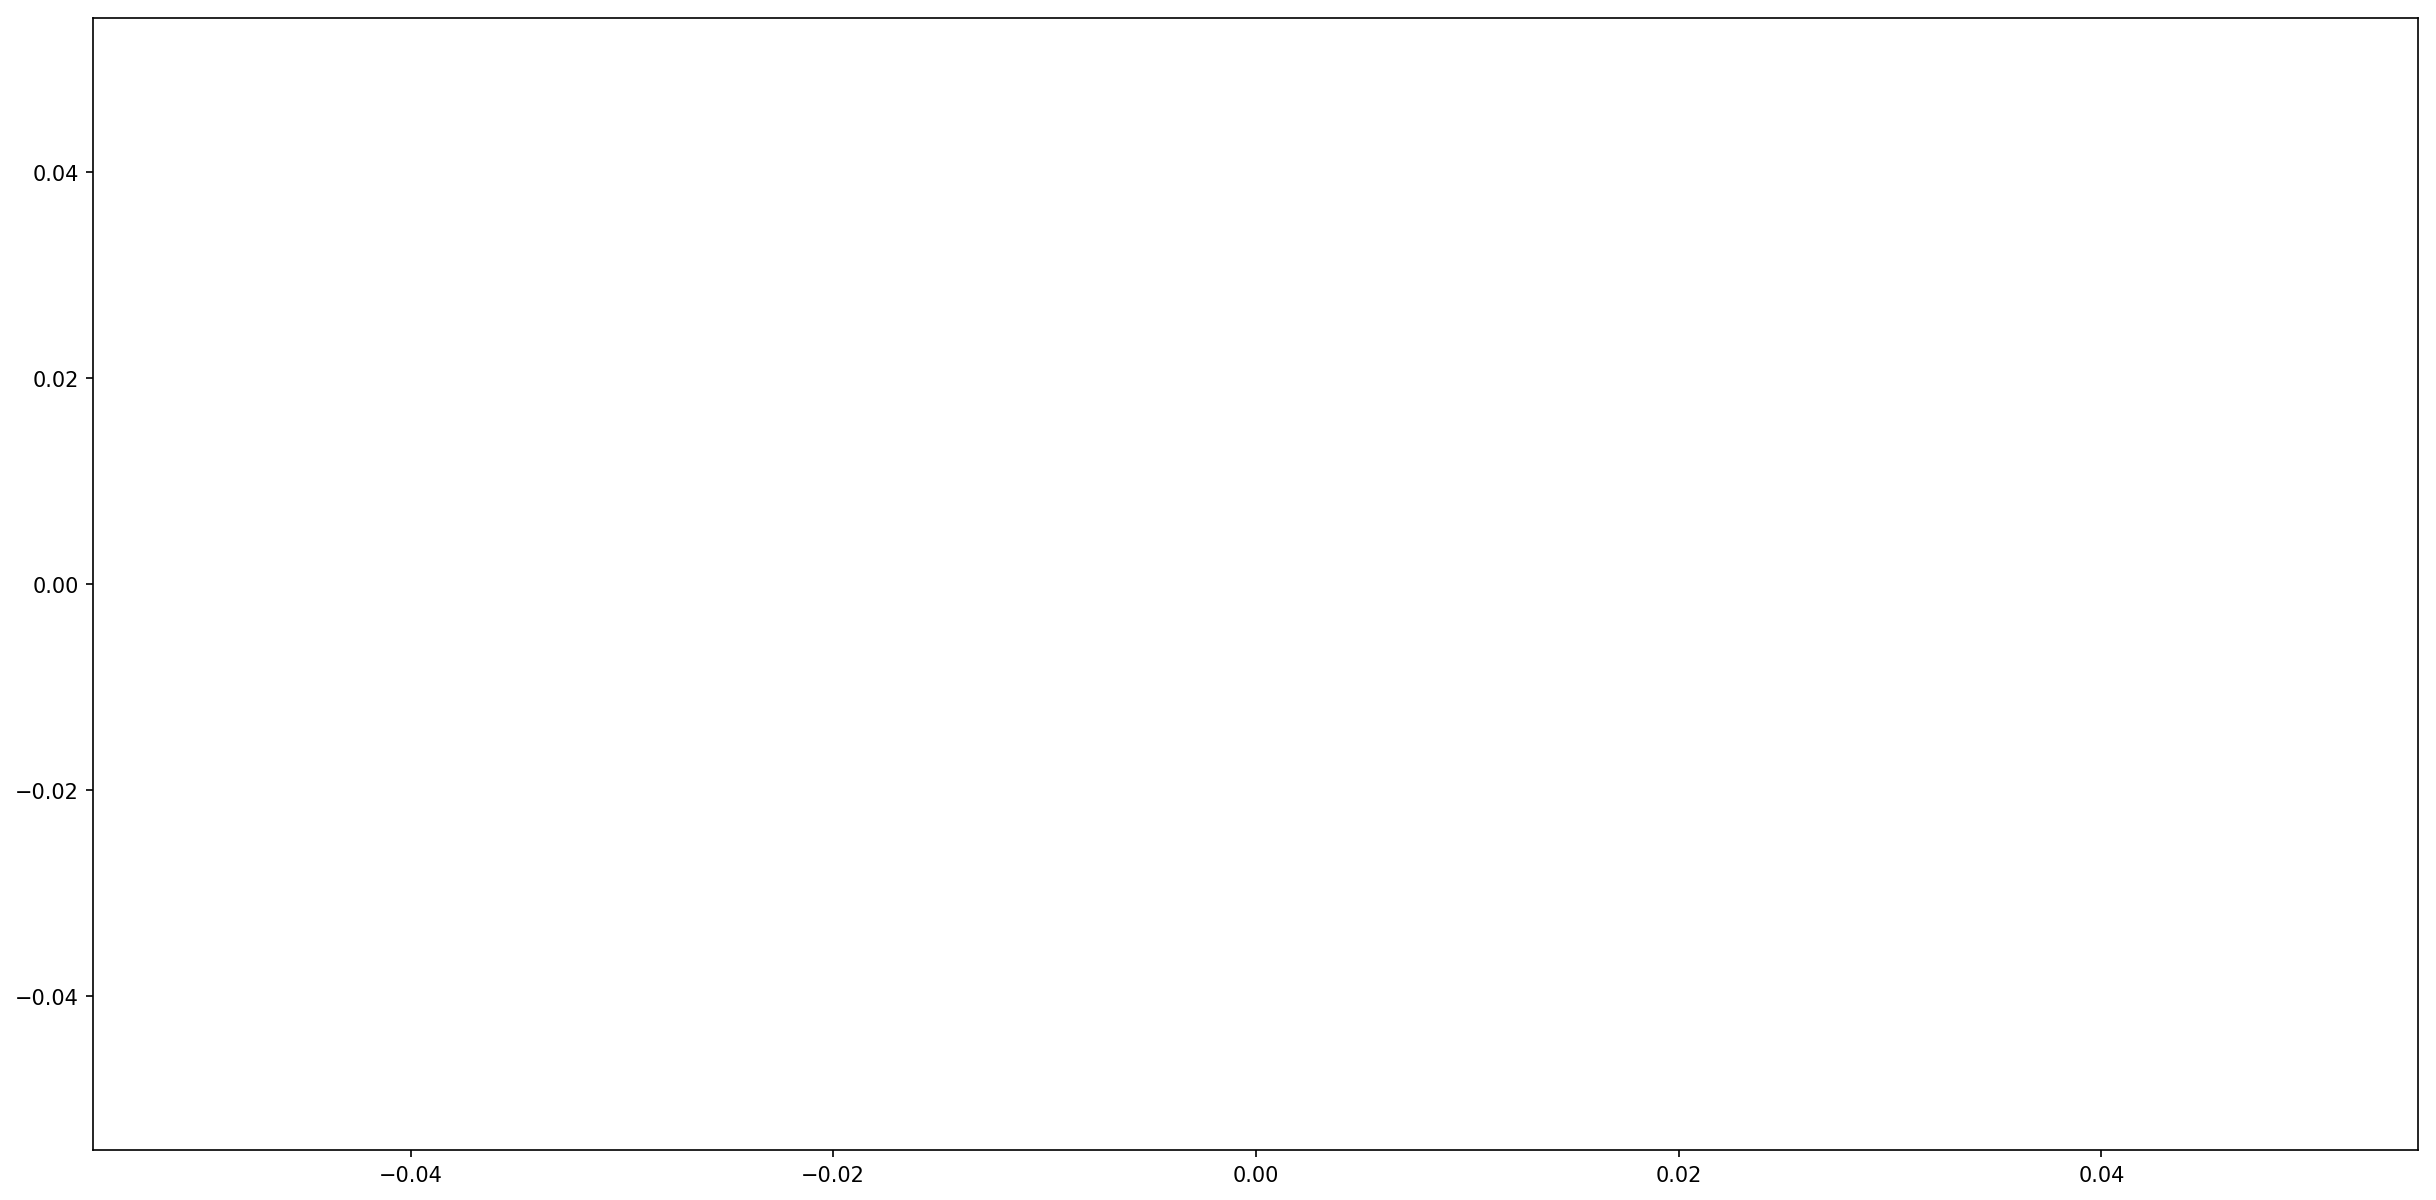

In [90]:
plt.figure(figsize=(20, 10), dpi=150)
plt.scatter(data.loc[(data['Longitude']>-70) & (data['Altitude(metros)']<-60)&(data['PRESSAO ATMOSFERICA (hPa)']<1500),:]['Longitude'],
           data.loc[(data['Longitude']>-70) & (data['Altitude(metros)']<-60)&(data['PRESSAO ATMOSFERICA (hPa)']<1500),:]['PRESSAO ATMOSFERICA (hPa)'])


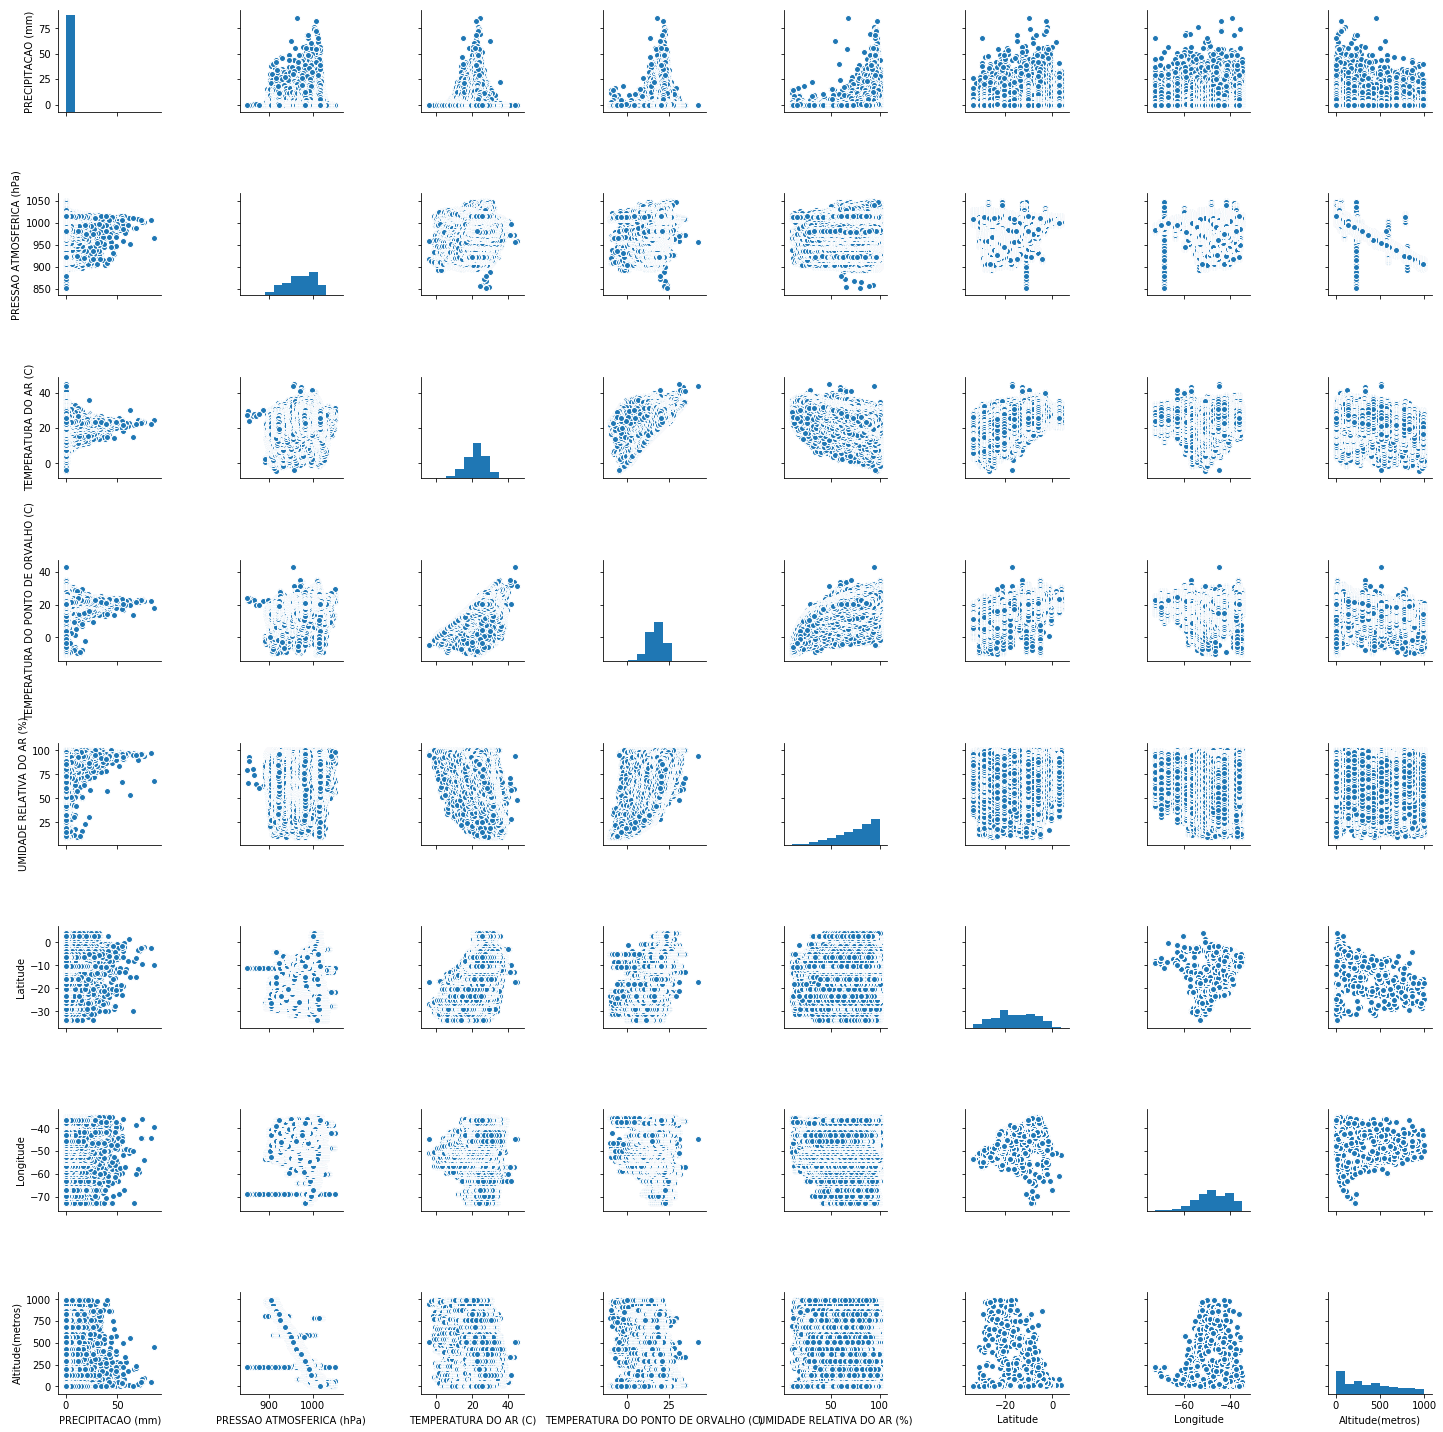

In [72]:
data.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv')


In [83]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                              0.000000
Codigo OMM                                    0.000000
Day                                           0.000000
H(UTC)                                        0.000000
Latitude                                      0.000000
Longitude                                     0.000000
Month                                         0.000000
Nome                                          0.000000
PRECIPITACAO (mm)                             0.000000
PRESSAO ATMOSFERICA (hPa)                     0.000185
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              0.000000
PRESSAO ATMOSFÉRICA MINIMA (hPa)              0.000000
TEMPERATURA DO AR (C)                         0.000000
TEMPERATURA DO PONTO DE ORVALHO (C)           0.000000
TEMPERATURA MAXIMA (C)                        0.000000
TEMPERATURA MINIMA (C)                        0.000000
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)    0.000000
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)    0.000000
UMIDADE RE

## Retirando os dados ausentes

### por trabalhamos com medias não iremos fazer recuperação dos dados ausentes apenas discarta-los.
### mas primeiro iremos descarta o atribulto de radiação global, que ja ele esta ausente em 50% da base

In [74]:
data.drop(columns=['RADIACAO GLOBAL (KJ/M2)','VENTO VELOCIDADE ','VENTO, DIRECAO (graus)','VENTO, RAJADA MAXIMA (m/s)'],inplace=True)

In [84]:
data.dropna(inplace=True)

In [85]:
data.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
month_num = str(5)
data = pd.read_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv').drop(columns=['Unnamed: 0'])
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257      5   
1             185.0     81963.0    1       1 -9.358353 -69.926257      5   
2             185.0     81963.0    1       3 -9.358353 -69.926257      5   
3             185.0     81963.0    1      13 -9.358353 -69.926257      5   
4             185.0     81963.0    1      14 -9.358353 -69.926257      5   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.2   
1  Parque Estadual Chandless-A102                0.4   
2  Parque Estadual Chandless-A102                0.2   
3  Parque Estadual Chandless-A102                0.4   
4  Parque Estadual Chandless-A102                0.4   

   PRESSAO ATMOSFERICA (hPa)   ...    TEMPERATURA MINIMA (C)  \
0                      992.0   ...                      24.5   
1                      993.4   ...                      24.3   
2                      993.9   ...                      23.8   
3                      994.6   ...                      24.1   
4                      995.0   ...                      25.8   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        24.0   
1                                        23.6   
2                                        23.2   
3                                        24.0   
4                                        24.1   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        23.5                        94.0   
1                                        23.5                        95.0   
2                                        23.0                        96.0   
3                                        23.4                        87.0   
4                                        22.5                        79.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  Year  \
0                               94.0                               92.0  2009   
1                               95.0                               94.0  2009   
2                               96.0                               95.0  2009   
3                               96.0                               87.0  2009   
4                               87.0                               76.0  2009   

                      Cidade  Estado  Regiao  
0  Parque Estadual Chandless    Acre   Norte  
1  Parque Estadual Chandless    Acre   Norte  
2  Parque Estadual Chandless    Acre   Norte  
3  Parque Estadual Chandless    Acre   Norte  
4  Parque Estadual Chandless    Acre   Norte  

[5 rows x 25 columns]

In [86]:
data.describe().T

count          mean  \
Altitude(metros)                            2708611.0    374.525047   
Codigo OMM                                  2708611.0  85315.605754   
Day                                         2708611.0     16.024150   
H(UTC)                                      2708611.0     11.564185   
Latitude                                    2708611.0    -15.727668   
Longitude                                   2708611.0    -47.569111   
Month                                       2708611.0      5.000000   
PRECIPITACAO (mm)                           2708611.0      0.120960   
PRESSAO ATMOSFERICA (hPa)                   2708611.0    972.381115   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2708611.0    972.644140   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2708611.0    972.121044   
TEMPERATURA DO AR (C)                       2708611.0     22.262200   
TEMPERATURA DO PONTO DE ORVALHO (C)         2708611.0     17.324374   
TEMPERATURA MAXIMA (C)                      2708611.0     22.878304   
TEMPERATURA MINIMA (C)                      2708611.0     21.678422   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2708611.0     17.818145   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2708611.0     16.854167   
UMIDADE RELATIVA DO AR (%)                  2708611.0     76.211208   
UMIDADE RELATIVA DO MAXIMA AR (%)           2708611.0     78.838003   
UMIDADE RELATIVA DO MINIMA AR (%)           2708611.0     73.488488   
Year                                        2708611.0   2011.571160   

                                                    std           min  \
Altitude(metros)                             285.063875      2.000000   
Codigo OMM                                  2276.275973  81609.000000   
Day                                            8.953763      1.000000   
H(UTC)                                         6.928564      0.000000   
Latitude                                       8.208085    -33.742297   
Longitude                                      6.869248    -72.786778   
Month                                          0.000000      5.000000   
PRECIPITACAO (mm)                              1.047911      0.000000   
PRESSAO ATMOSFERICA (hPa)                     31.334213    891.500000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              31.351941    891.700000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              31.317876    891.300000   
TEMPERATURA DO AR (C)                          5.462064     -4.200000   
TEMPERATURA DO PONTO DE ORVALHO (C)            4.477656     -9.700000   
TEMPERATURA MAXIMA (C)                         5.566050     -4.100000   
TEMPERATURA MINIMA (C)                         5.353790     -4.600000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     4.438060     -9.200000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     4.532273    -10.900000   
UMIDADE RELATIVA DO AR (%)                    17.433436     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             16.376839     10.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             18.288992      7.000000   
Year                                           3.067968   2000.000000   

                                                     25%           50%  \
Altitude(metros)                              107.000000    339.000000   
Codigo OMM                                  81970.000000  86722.000000   
Day                                             8.000000     16.000000   
H(UTC)                                          6.000000     12.000000   
Latitude                                      -22.300421    -15.902658   
Longitude                                     -52.381980    -48.111839   
Month                                           5.000000      5.000000   
PRECIPITACAO (mm)                               0.000000      0.000000   
PRESSAO ATMOSFERICA (hPa)                     949.700000    975.300000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              949.900000    975.600000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              949.400000    975.

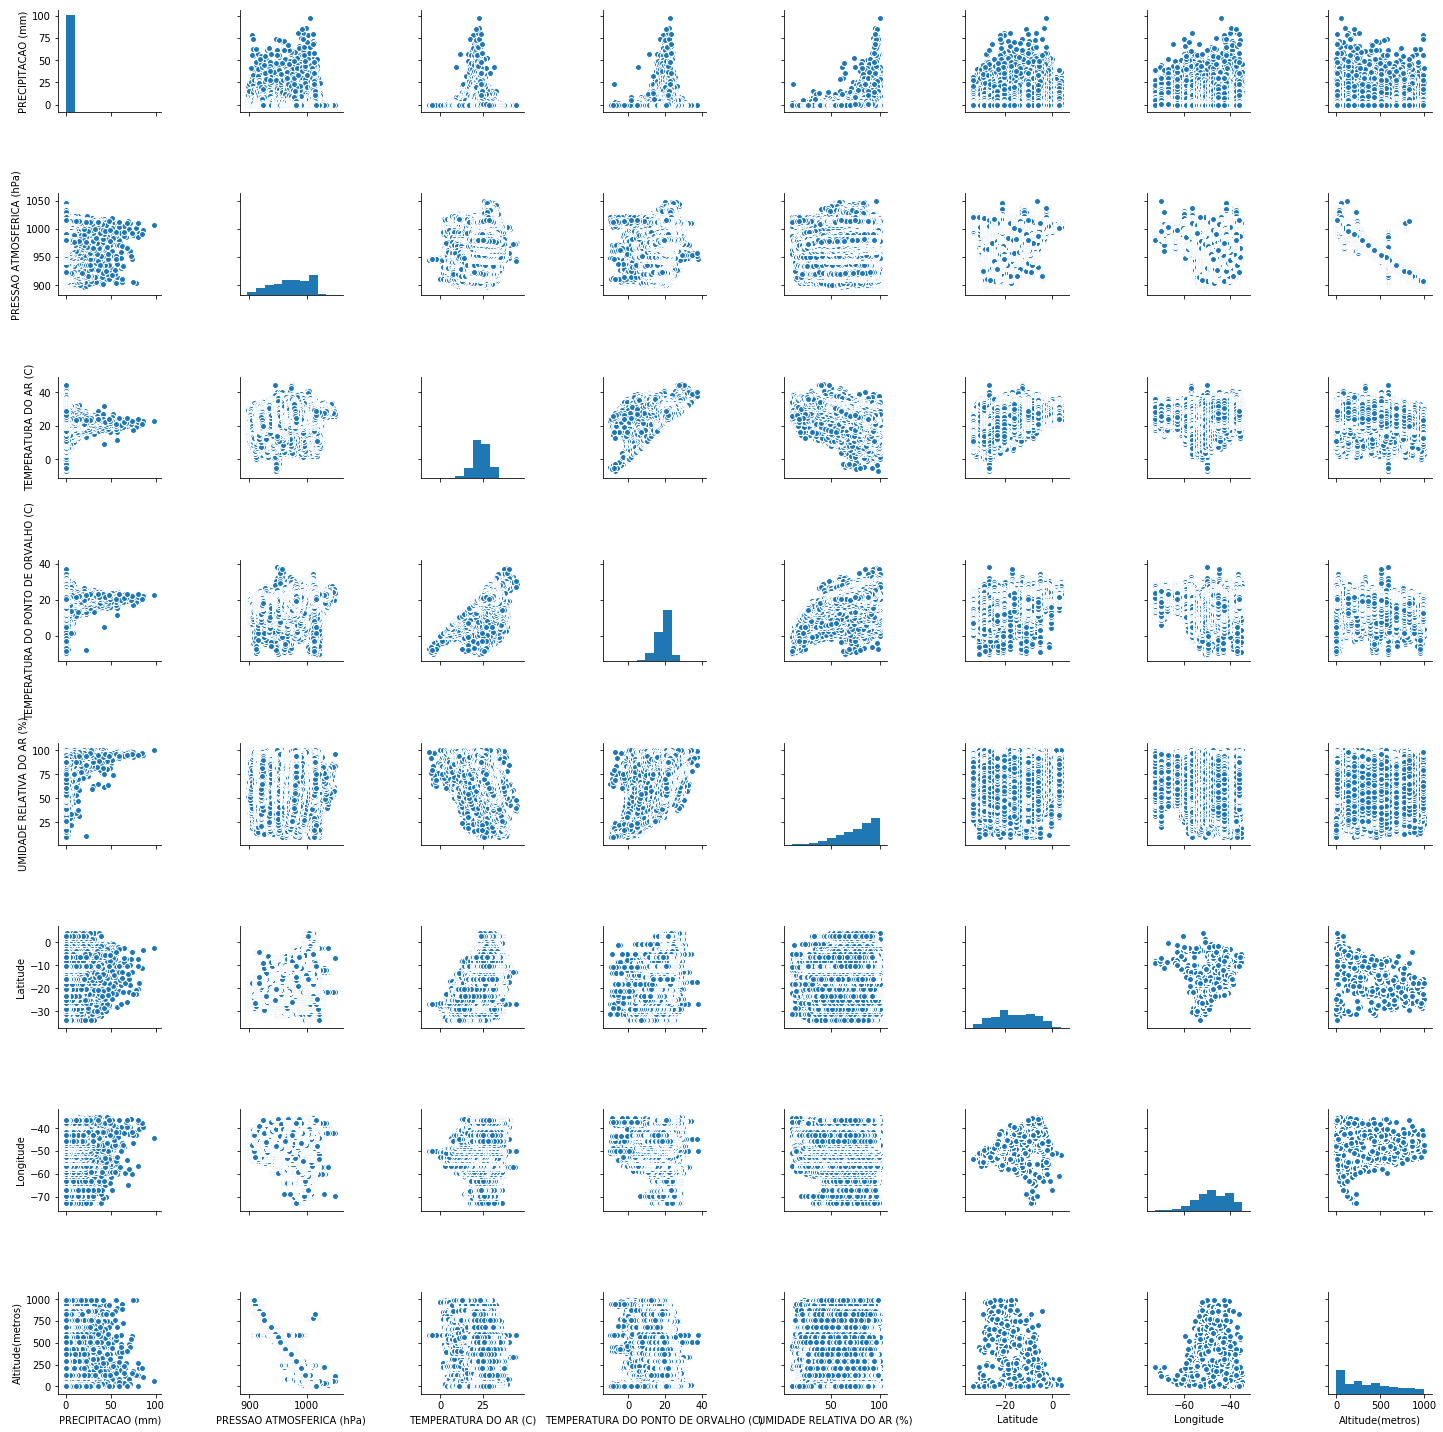

In [67]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

### Fazendo a base de dados com as medias mensais de cada estação

In [2]:
data_mean = data.groupby(['Nome']).agg('mean')
data_mean.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_mean.csv')
data_mean.head(5)

Altitude(metros)  Codigo OMM        Day     H(UTC)  \
Nome                                                                      
Abrolhos-A422                    21.0     86765.0  14.870101  11.480776   
Acaraú-A360                      67.0     81755.0  16.421121  11.512299   
Afonso Cláudio-A657             507.0     86827.0  16.658030  11.523633   
Aimorés-A534                    288.0     86803.0  16.054021  11.595616   
Alegre-A617                     129.0     86828.0  15.697211  11.517560   

                      Latitude  Longitude  Month  PRECIPITACAO (mm)  \
Nome                                                                  
Abrolhos-A422       -17.963016 -38.703288    5.0           0.042777   
Acaraú-A360          -3.121067 -40.087288    5.0           0.117625   
Afonso Cláudio-A657 -20.104194 -41.106861    5.0           0.060251   
Aimorés-A534        -19.532768 -41.090801    5.0           0.047497   
Alegre-A617         -20.750412 -41.488852    5.0           0.075791   

                     PRESSAO ATMOSFERICA (hPa)  \
Nome                                             
Abrolhos-A422                      1014.484136   
Acaraú-A360                        1004.380988   
Afonso Cláudio-A657                 958.894505   
Aimorés-A534                        988.033604   
Alegre-A617                        1001.842896   

                     PRESSAO ATMOSFÉRICA MAXIMA (hPa)     ...       \
Nome                                                      ...        
Abrolhos-A422                             1014.716573     ...        
Acaraú-A360                               1004.638487     ...        
Afonso Cláudio-A657                        959.132062     ...        
Aimorés-A534                               988.279841     ...        
Alegre-A617                               1002.093857     ...        

                     TEMPERATURA DO AR (C)  \
Nome                                         
Abrolhos-A422                    25.674468   
Acaraú-A360                      26.262992   
Afonso Cláudio-A657              20.477249   
Aimorés-A534                     22.913031   
Alegre-A617                      21.614597   

                     TEMPERATURA DO PONTO DE ORVALHO (C)  \
Nome                                                       
Abrolhos-A422                                  20.508735   
Acaraú-A360                                    22.936582   
Afonso Cláudio-A657                            15.542227   
Aimorés-A534                                   16.997981   
Alegre-A617                                    17.103310   

                     TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
Nome                                                                  
Abrolhos-A422                     26.042180               25.329601   
Acaraú-A360                       26.805696               25.748234   
Afonso Cláudio-A657               21.122494               19.876139   
Aimorés-A534                      23.574819               22.304677   
Alegre-A617                       22.225119               21.032331   

                     TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         20.989698   
Acaraú-A360                                           23.359109   
Afonso Cláudio-A657                                   16.008912   
Aimorés-A534                                          17.496117   
Alegre-A617                                           17.601937   

                     TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         20.030198   
Acaraú-A360                                           22.538487   
Afonso Cláudio-A657                                   15.105154   
Aimorés-A534                                          16.525129   
Alegre-A617                              

In [3]:
data_mean['Precipitação Acum.(mm)'] = data.groupby(['Nome','Year']).agg('sum').groupby('Nome').agg('mean')['PRECIPITACAO (mm)']

data_mean.to_csv('./Tempo-Clima/Dados/Brasil_5_mean.csv')

In [92]:
data_mean.describe().T

count          mean          std  \
Altitude(metros)                            461.0    365.451193   282.146432   
Codigo OMM                                  461.0  85210.234273  2320.555153   
Day                                         461.0     16.063091     0.749579   
H(UTC)                                      461.0     11.564696     0.158921   
Latitude                                    461.0    -15.340775     8.258403   
Longitude                                   461.0    -48.004837     7.244575   
Month                                       461.0      5.000000     0.000000   
PRECIPITACAO (mm)                           461.0      0.123193     0.103104   
PRESSAO ATMOSFERICA (hPa)                   461.0    973.251006    30.782970   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            461.0    973.514332    30.799190   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            461.0    972.990365    30.768796   
TEMPERATURA DO AR (C)                       461.0     22.450030     3.834410   
TEMPERATURA DO PONTO DE ORVALHO (C)         461.0     17.508663     3.676890   
TEMPERATURA MAXIMA (C)                      461.0     23.066945     3.843669   
TEMPERATURA MINIMA (C)                      461.0     21.863477     3.827771   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  461.0     18.004193     3.669407   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  461.0     17.036709     3.690579   
UMIDADE RELATIVA DO AR (%)                  461.0     76.253248     7.440762   
UMIDADE RELATIVA DO MAXIMA AR (%)           461.0     78.892754     7.140832   
UMIDADE RELATIVA DO MINIMA AR (%)           461.0     73.526899     7.688150   
Year                                        461.0   2011.909165     1.286834   

                                                     min           25%  \
Altitude(metros)                                2.000000    112.000000   
Codigo OMM                                  81609.000000  81951.000000   
Day                                            14.866300     15.933319   
H(UTC)                                         10.250000     11.500000   
Latitude                                      -33.742297    -21.855567   
Longitude                                     -72.786778    -52.931912   
Month                                           5.000000      5.000000   
PRECIPITACAO (mm)                               0.000000      0.047625   
PRESSAO ATMOSFERICA (hPa)                     905.382490    951.965793   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              905.591783    952.204472   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              905.171366    951.738161   
TEMPERATURA DO AR (C)                          12.569929     19.747944   
TEMPERATURA DO PONTO DE ORVALHO (C)             9.638363     14.459362   
TEMPERATURA MAXIMA (C)                         13.169415     20.434008   
TEMPERATURA MINIMA (C)                         12.011766     19.172457   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     10.132744     14.972828   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)      9.140936     13.979593   
UMIDADE RELATIVA DO AR (%)                     52.939649     71.199623   
UMIDADE RELATIVA DO MAXIMA AR (%)              55.579334     74.478720   
UMIDADE RELATIVA DO MINIMA AR (%)              50.456125     68.283956   
Year                                         2008.475984   2011.424007   

                                                     50%           75%  \
Altitude(metros)                              324.000000    552.000000   
Codigo OMM                                  86707.000000  86854.000000   
Day                                            16.000150     16.112511   
H(UTC)                                         11.514337     11.589424   
Latitude                                      -15.244620     -8.509552   
Longitude                                     -48.201231    -42.182817   
Month                                           5.000000      5.000000   
PRECIPITACAO (mm)                               0.098771      

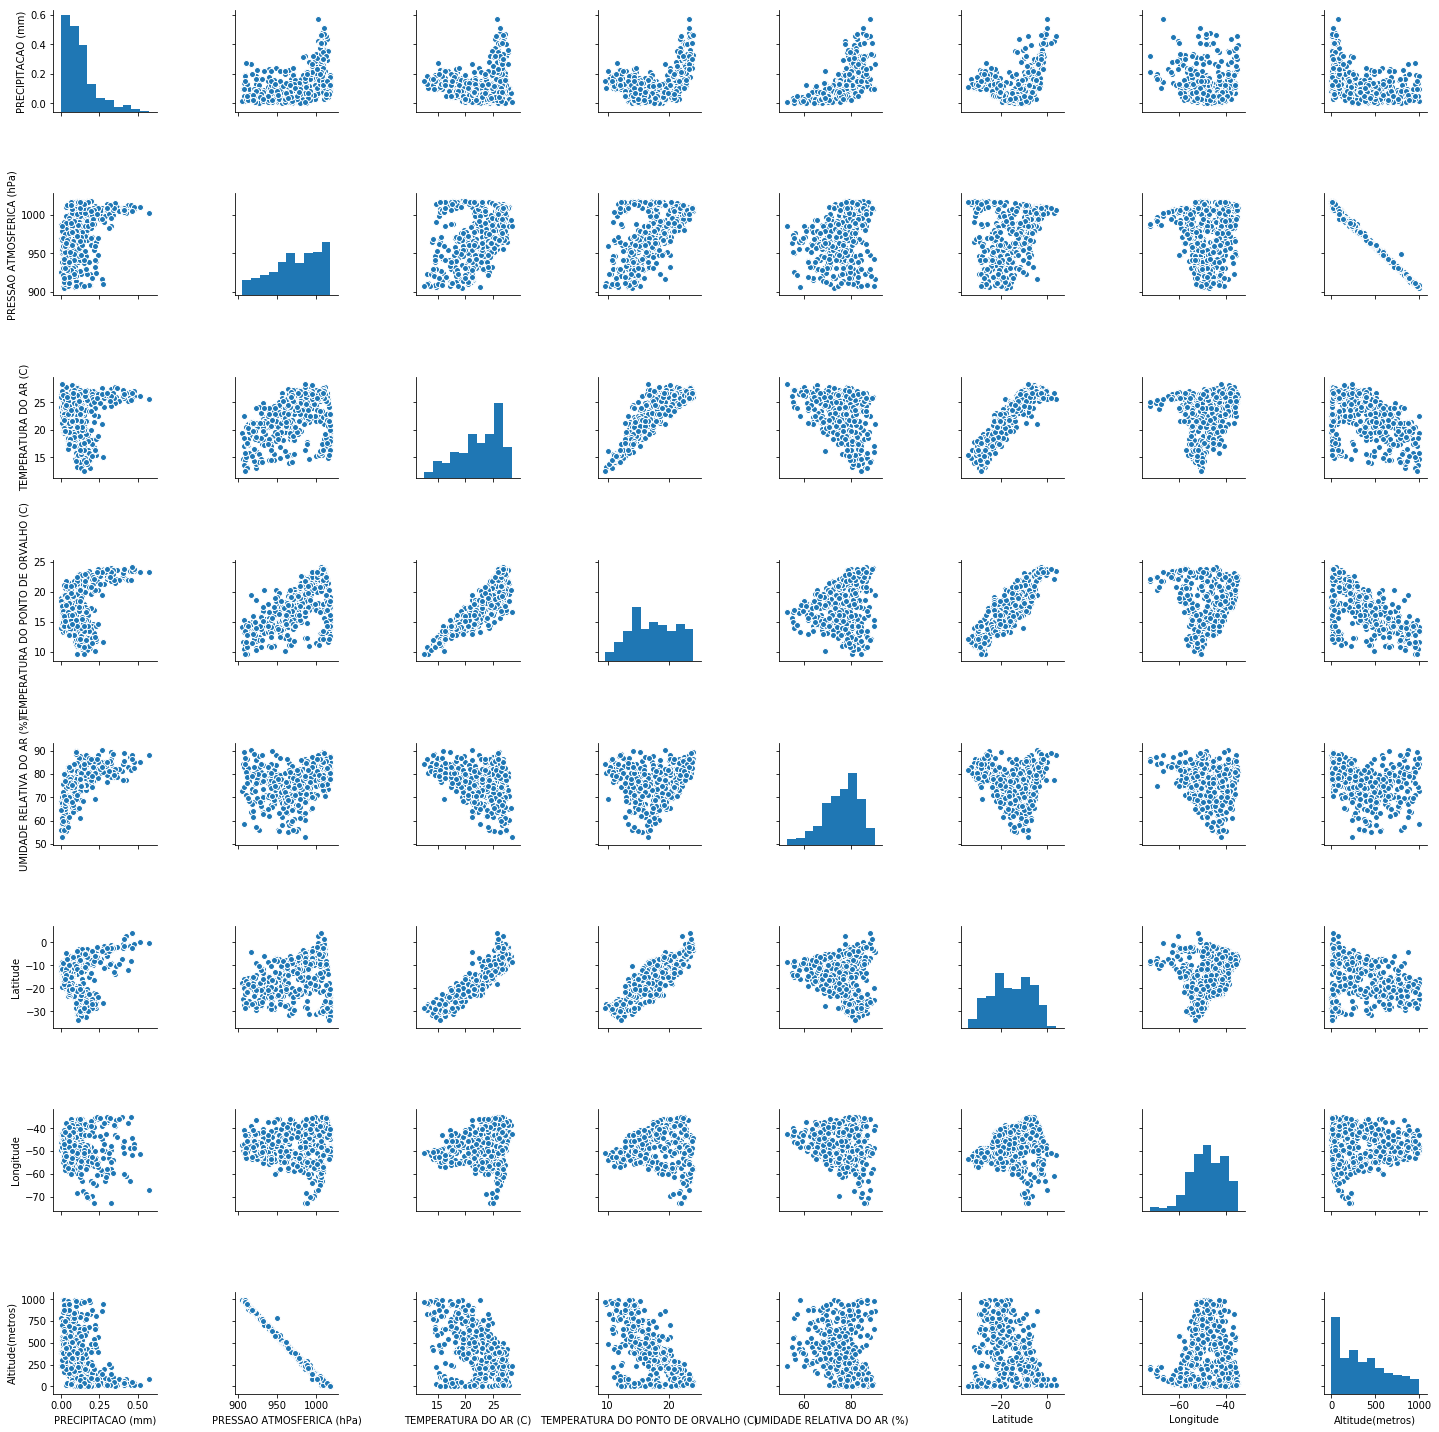

In [93]:
sns.pairplot(data_mean[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [94]:
target_wanderlay = ['UMIDADE RELATIVA DO AR (%)']
features_UR_wanderlay = data_mean.columns.tolist()
features_UR_wanderlay.remove('Day')
features_UR_wanderlay.remove('Month')
features_UR_wanderlay.remove('Codigo OMM')
features_UR_wanderlay.remove('Year')
features_UR_wanderlay.remove('H(UTC)')
#features_UR_wanderlay.remove('VENTO VELOCIDADE ')
#features_UR_wanderlay.remove('VENTO, DIRECAO (graus)')
#features_UR_wanderlay.remove('VENTO, RAJADA MAXIMA (m/s)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MINIMA AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MAXIMA AR (%)')
features_UR_wanderlay.remove('TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO AR (C)')
#features_UR_wanderlay.remove('TEMPERATURA MAXIMA (C)')
#features_UR_wanderlay.remove('TEMPERATURA MINIMA (C)')
features_UR_wanderlay.remove('PRECIPITACAO (mm)')
features_UR_wanderlay.remove('PRESSAO ATMOSFERICA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MAXIMA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MINIMA (hPa)')




features_UR_wanderlay

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'TEMPERATURA MAXIMA (C)',
 'TEMPERATURA MINIMA (C)']

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_mean[features_UR_wanderlay], data_mean[target_wanderlay],test_size=.25)

In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

In [97]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)


In [98]:
import sklearn.metrics as metrics
print('Variance: {}'.format(metrics.explained_variance_score(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro absoluto medio: {}'.format(metrics.mean_absolute_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro quadrado medio: {}'.format(metrics.mean_squared_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro absoluto mediano: {}'.format(metrics.median_absolute_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('R2 Score: {}'.format(metrics.r2_score(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))

Variance: 0.8350267556877501
Erro absoluto medio: 2.3171864816130068
Erro quadrado medio: 9.362967894685074
Erro absoluto mediano: 1.5882948540434754
R2 Score: 0.8279357263386605


In [99]:
errors=abs(scaler_y.inverse_transform(y_test).ravel()-scaler_y.inverse_transform([y_pred,]))
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Error(UR_true - UR_pred)
MIN: 0.07367782315752436 	MAX: 10.783377038845956 	MEAN: 2.3171864816130068	Std: 1.9984030384572098


In [100]:
df_rest = pd.DataFrame(data = scaler_y.inverse_transform(y_test).ravel(),columns=['Y_true'])
df_rest['Y_pred'] = scaler_y.inverse_transform(y_test).ravel()
df_rest.sort_values(['Y_pred','Y_true']).head(5)

Y_true     Y_pred
58  52.939649  52.939649
72  55.893502  55.893502
2   56.098724  56.098724
9   58.644481  58.644481
31  59.933061  59.933061

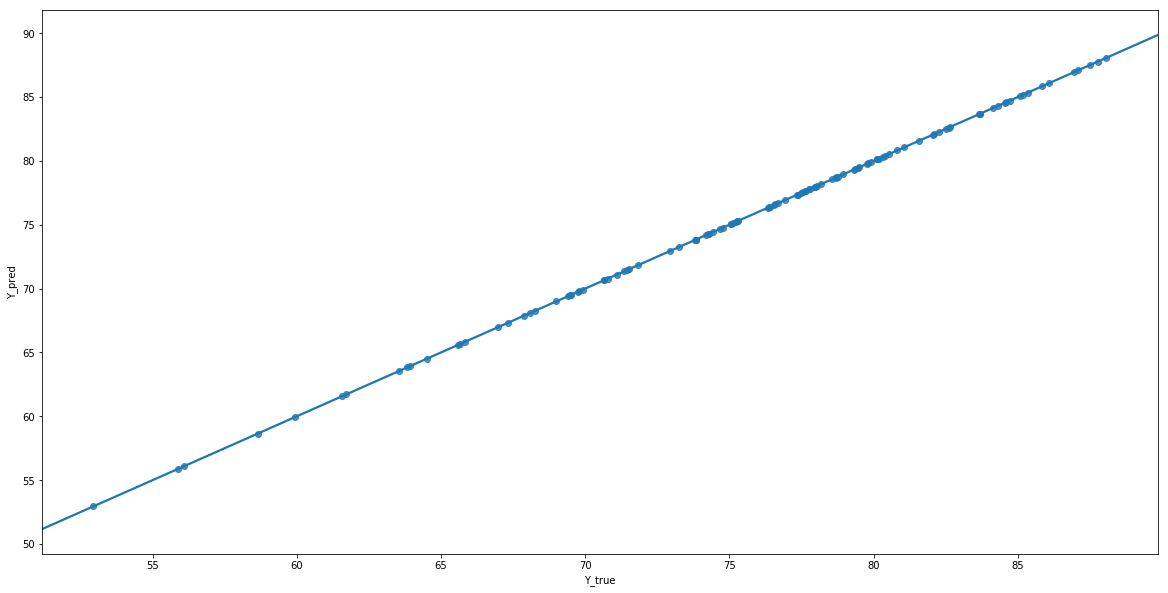

In [101]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(x="Y_true", y="Y_pred", data=df_rest,ax=ax)

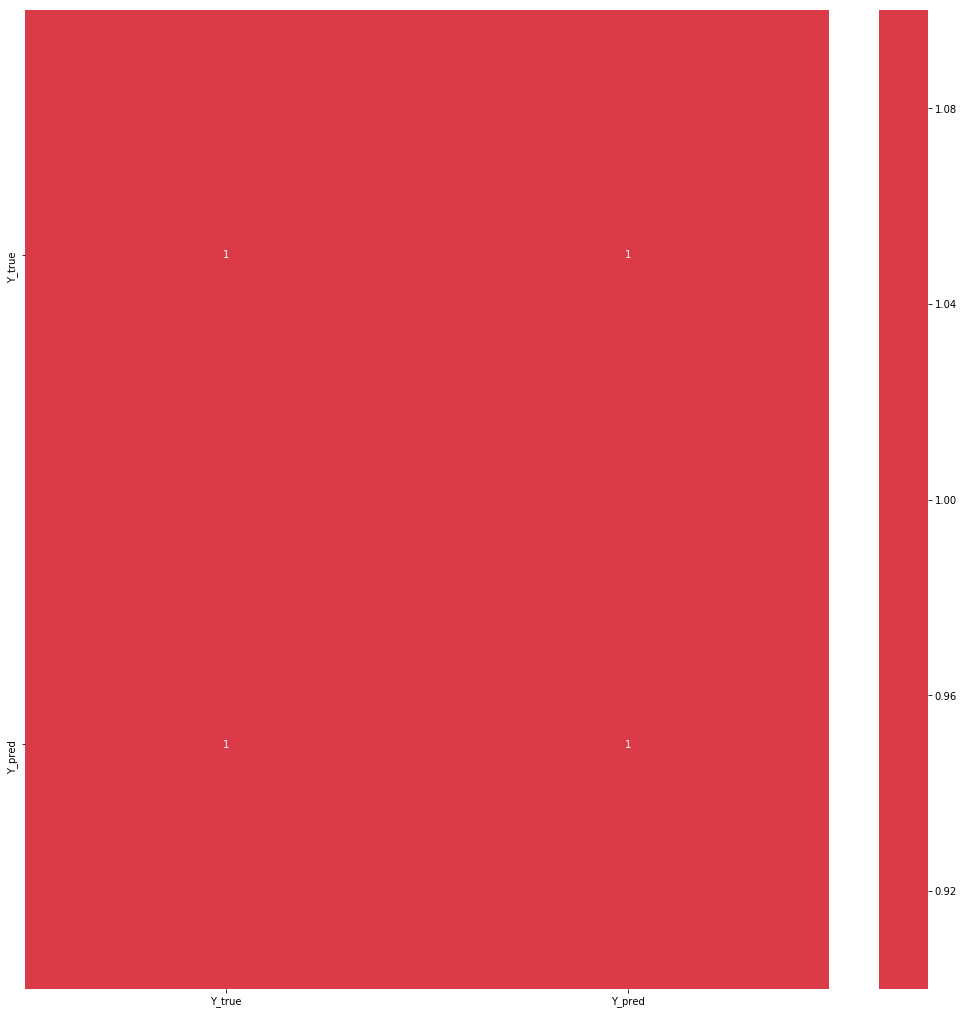

In [102]:
cor_matrix = df_rest.corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()